In [1]:
from libsvm.svmutil import *
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
import math
# %matplotlib inline

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    # print(data)
    return data[:, :2], data[:, -1]

In [3]:
def set_ax_gray(ax):
    ax.patch.set_facecolor("gray")
    ax.patch.set_alpha(0.1)
    ax.spines['right'].set_color('none')  # 设置隐藏坐标轴
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.grid(axis='y', linestyle='-.')


def plt_support_(svm_model, X_, y_, kernel, c):
    pos = y_ == 1
    neg = y_ == -1
    ax = plt.subplot()

    x_tmp = np.linspace(4, 7, 600)
    y_tmp = np.linspace(2, 5, 600)

    X_tmp, Y_tmp = np.meshgrid(x_tmp, y_tmp)

    x_data = np.c_[X_tmp.ravel(), Y_tmp.ravel()]
    Z_rbf, _, _ = svm_predict(np.ones(x_data.shape[0]), x_data, svm_model)

    # ax.contourf(X_, Y_, Z_rbf, alpha=0.75)
    cs = ax.contour(X_tmp, Y_tmp, np.array(Z_rbf).reshape(X_tmp.shape), [0], colors='orange', linewidths=1) 
    ax.clabel(cs, fmt={cs.levels[0]: 'decision boundary'})

    set_ax_gray(ax)

    ax.scatter(X_[pos, 0], X_[pos, 1], label='1', color='c')
    ax.scatter(X_[neg, 0], X_[neg, 1], label='0', color='lightcoral')

    sv = []
    for item in svm_model.get_SV():
        sv.append([item[1], item[2]])
    sv = np.array(sv)
    ax.scatter(sv[:, 0], sv[:, 1], marker='o', c='r', edgecolors='g', s=150,
               label='support_vectors')

    ax.legend()
    ax.set_title('{} kernel, C={}'.format(kernel, c))
    plt.show()

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

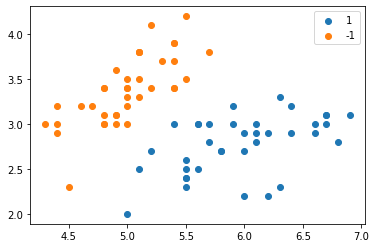

In [5]:
plt.scatter(X_train[np.argwhere(y_train == 1),0],X_train[np.argwhere(y_train == 1),1], label='1')
plt.scatter(X_train[np.argwhere(y_train == -1),0],X_train[np.argwhere(y_train == -1),1], label='-1')
plt.legend()

## SVM

In [18]:
lina_options = '-t 0 -c 1 -b 1'      #线性核
guass_options = '-t 2 -c 4 -b 1'     # 高斯核
lina_model = svm_train(y_train,X_train,lina_options)
svm_save_model('./static/xiGua3.3alpha_linear',lina_model)
guass_model = svm_train(y_train,X_train,guass_options)
svm_save_model('./static/xiGua3.3alpha_Guass',guass_model)

In [19]:
lina_p_label, lina_p_acc, lina_p_val = svm_predict(y_test, X_test, lina_model)
guass_p_label, guass_p_acc, guass_p_val = svm_predict(y_test, X_test, guass_model)

Model supports probability estimates, but disabled in predicton.
Accuracy = 100% (25/25) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 100% (25/25) (classification)


In [21]:
plt_support_(lina_model, X_test, y_test,  "linear", 1000)
plt_support_(guass_model, X_test, y_test,  "guass", 1000)

Model supports probability estimates, but disabled in predicton.


KeyboardInterrupt: 

## SVR

Model supports probability estimates, but disabled in predicton.
Mean squared error = 1.62822 (regression)
Squared correlation coefficient = nan (regression)


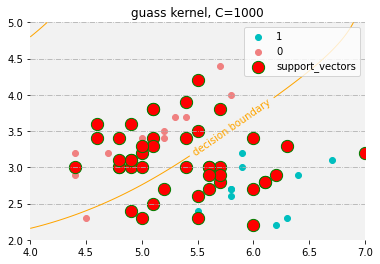

In [76]:
# svr
svr_guass_options = '-s 3 -t 2 -c 1 -b 1'     # 高斯核
svr_guass_model = svm_train(y_train,X_train,svr_guass_options)
svm_save_model('./static/problem_6.8_XG3.3alpha_guass',svr_guass_model)
plt_support_(svr_guass_model, X_test, y_test,  "guass", 1000)

In [97]:
x_tmp = np.linspace(4, 7, 600)
y_tmp = np.linspace(2, 5, 600)

X_tmp, Y_tmp = np.meshgrid(x_tmp, y_tmp)

x_data = np.c_[X_tmp.ravel(), Y_tmp.ravel()]
Z_rbf, _, _ = svm_predict(np.ones(x_data.shape[0]), x_data, svr_guass_model)


Model supports probability estimates, but disabled in predicton.
Mean squared error = 1.62822 (regression)
Squared correlation coefficient = nan (regression)


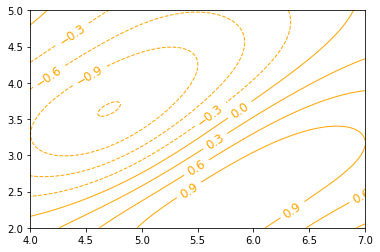

In [98]:
# 方便对等高线图的理解
ax = plt.subplot()
cs = ax.contour(X_tmp, Y_tmp, np.array(Z_rbf).reshape(X_tmp.shape), colors='orange', linewidths=1)
plt.clabel(cs, inline=True, fontsize=12)
plt.show()

## 核对率回归

In [10]:
len_x = len(X_train)
kappa = np.mat(np.zeros([len_x, len_x]))
gamma = 1.0 / 0.3

x = np.mat(X_train).T
y = np.mat(y_train).T

for i in range(len_x):
    for j in range(len_x):
        tmp_vec = x[:, i] - x[:, j]
        kappa[i, j] = tmp_vec.T * tmp_vec
kappa = -gamma * kappa
kappa = np.exp(kappa)

# kappa = x.T * x
# print(kappa.shape)

alpha = np.mat(np.zeros([len_x, 1]))
ell = 0
for i in range(len_x):
    ell = ell + -y[i, 0] * alpha.T * kappa[i, :].T + math.log(1 + math.exp(alpha.T * kappa[i, :].T))

steps = 50
lst_crrct_rate = []
for s in range(steps):
    tmp_exp = np.exp(alpha.T * kappa.T)
    p1 = (tmp_exp / (1 + tmp_exp)).T
    second_da = -kappa * (y - p1)
    first_da = np.zeros([len_x, len_x])
    for i in range(len_x):
        first_da = first_da + kappa[i, :].T * kappa[i, :] * p1[i, 0] * (1 - p1[i, 0])
    # print(alpha)
    u, sigmav, vt = np.linalg.svd(first_da)
    sigma = np.zeros([len(sigmav), len(sigmav)])
    for i in range(len(sigmav)):
        sigma[i][i] = sigmav[i]
    sigma = np.mat(sigma)
    first_da_inv = vt.T * sigma.I * u.T

    alpha = alpha - first_da_inv * second_da
    correct_rate = 0
    for j in range(len_x):
        index_value = -(alpha.T * kappa[j, :].T)[0, 0]
        # y_ = 1.0 / (1.0 + math.exp(-(alpha.T * kappa[j, :].T)[0, 0]))
        # print(index_value, y_)
        if index_value <= 0 and y[j] == 1 or index_value > 0 and y[j] == -1:
        # if y_ >= 0.5 and y[j] == 1 or y_ < 0.5 and y[j] == 0:
            correct_rate = correct_rate + 1
    lst_crrct_rate.append(correct_rate/len_x)
    print(lst_crrct_rate)
    # if 1.0 * correct_rate / len_x > 0.95:
    #     break

plt.scatter(range(len(lst_crrct_rate)), lst_crrct_rate)


[1.0]
[1.0, 1.0]
[1.0, 1.0, 0.72]
C:\Users\FX2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
C:\Users\FX2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


LinAlgError: SVD did not converge